In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_csv("../input/SalesData.csv")

In [3]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
AccountId             3709 non-null int64
AccountName           3709 non-null object
Region                3709 non-null object
Division              3709 non-null object
City                  3709 non-null object
State                 3709 non-null object
Tier                  3709 non-null object
Month                 3709 non-null object
Sales2015             3709 non-null float64
Sales2016             3709 non-null float64
Units2015             3709 non-null float64
Units2016             3709 non-null float64
TargetAchevied2015    3709 non-null float64
TargetAchevied2016    3709 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [5]:
sales1 = sales.groupby('Region').agg({'Sales2016':'sum','Sales2015':'sum'})
sales1

,Sales2016,Sales2015
Region,,
Central,9.787809e+06,7.891729e+06
East,1.266723e+07,9.512916e+06
West,7.209689e+06,5.349745e+06


Text(0.5, 0, 'Total Sales')

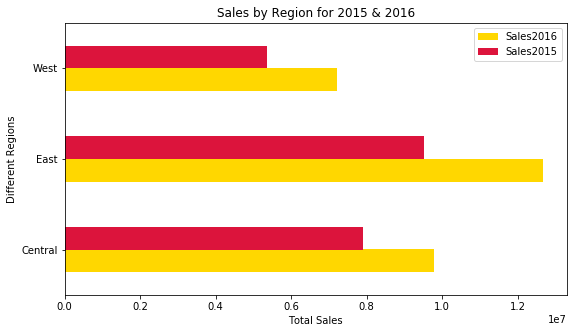

In [6]:
ax=sales1.plot.barh(figsize=(9,5),color=('#FFD700','#DC143C'),grid=False,title='Sales by Region for 2015 & 2016')

ax.set_ylabel('Different Regions')
ax.set_xlabel('Total Sales')

As seen above, sales for all regions have increased from the previous 2015 to next year 2016.

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

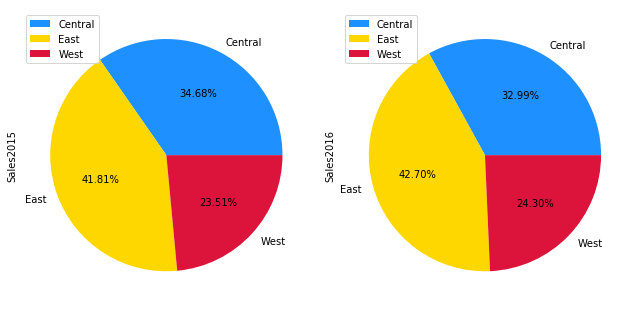

In [7]:
sales2=sales.groupby('Region').agg({'Sales2015':sum,'Sales2016':sum})
sales2.plot.pie(legend=True,autopct='%.2f%%',subplots=True,figsize=(9,5),colors=('#1E90FF','#FFD700','#DC143C'))
[ax.legend(loc=2) for ax in plt.gcf().axes]  #for placement of legend bar, where gcf() is get current figure
plt.tight_layout()   #to prevent overlapping of axes

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [8]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [9]:
sales3=sales.groupby(['Region','Tier']).agg({'Sales2015':sum,'Sales2016':sum})
sales3

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

Text(0, 0.5, 'Sales')

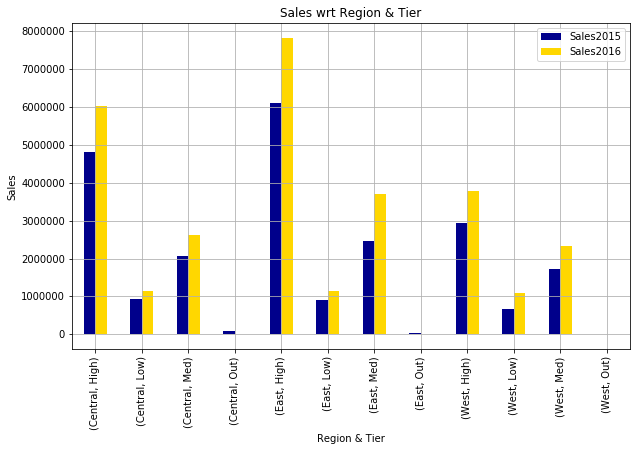

In [10]:
ax=sales3.plot.bar(figsize=(10,6),color=('#00008B','#FFD700'),grid=True)
ax.set_title('Sales wrt Region & Tier')
ax.set_xlabel('Region & Tier')
ax.set_ylabel('Sales')

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [11]:
sales4=sales[sales.Region=='East'][['Region','State','Sales2015','Sales2016']].groupby('State').agg({'Sales2015':sum,'Sales2016':sum})
sales4

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


Text(0.5, 0, 'States')

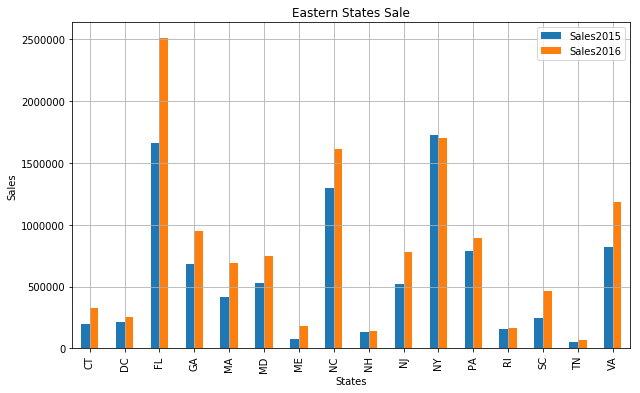

In [12]:
ax=sales4.plot.bar(figsize=(10,6),grid=True)  #

ax.set_title('Eastern States Sale')
ax.set_ylabel('Sales')
ax.set_xlabel('States')

As clear from the plot, the following state(s) have registered a decline from 2015 to 2016.

* NY

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [13]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [14]:
sales5=sales[sales['Tier']=='High'].groupby('Division').agg({'Units2015':sum,'Units2016':sum})
sales5

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


Text(0.5, 0, 'Divisions (Tier=HIGH)')

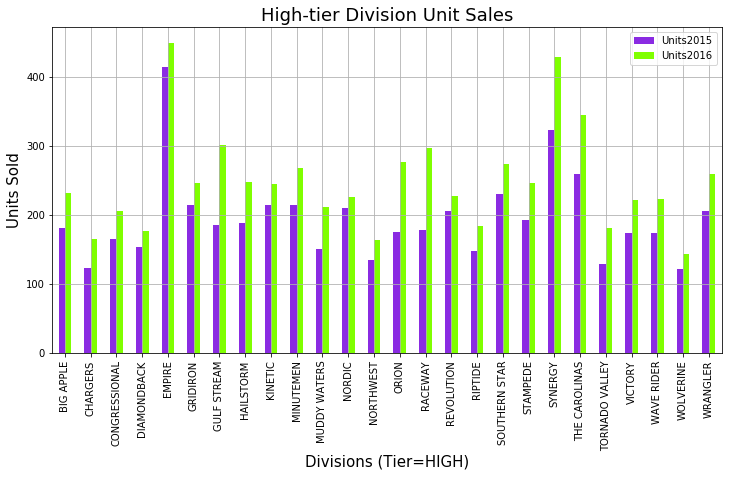

In [15]:
ax=sales5.plot.bar(legend=True,figsize=(12,6),grid=True,color=('#8A2BE2','#7FFF00'))
ax.set_title('High-tier Division Unit Sales',size=(18))
ax.set_ylabel('Units Sold',size=(15))
ax.set_xlabel('Divisions (Tier=HIGH)',size=(15))

As seen from the plot, NO division saw a decline in unit sales from 2015 to 2016.


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [16]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [17]:
def qrtr(f):
    if ((f=='Jan')or(f=='Feb')or(f=='Mar')):
        return('Q1')
    elif ((f=='Apr')or(f=='May')or(f=='Jun')):
        return('Q2')
    elif ((f=='Jul')or(f=='Aug')or(f=='Sep')):
        return('Q3')
    elif ((f=='Oct')or(f=='Nov')or(f=='Dec')):
        return('Q4')
    
sales['Qtr']=sales.Month.apply(lambda v :qrtr(v))

In [18]:
# checking month & corresponding Qtr.
sales.iloc[500:511,[7,14]]

,Month,Qtr
500,Apr,Q2
501,Mar,Q1
502,Nov,Q4
503,Nov,Q4
504,Dec,Q4
505,May,Q2
506,Apr,Q2
507,Aug,Q3
508,Oct,Q4
509,Sep,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [19]:
sales6=sales.groupby('Qtr').agg({'Sales2015':sum,'Sales2016':sum})
sales6

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


Text(0.5, 0, 'Quarter')

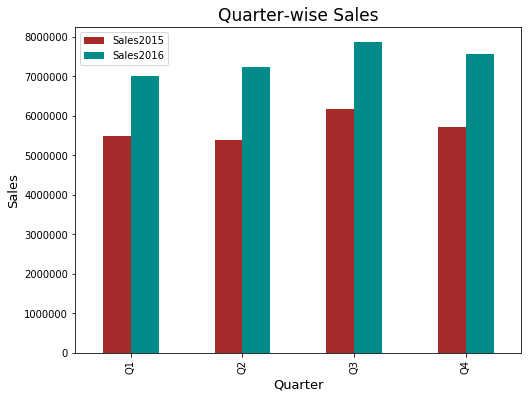

In [20]:
ax=sales6.plot.bar(figsize=(8,6),grid=False,color=('#A52A2A','#008B8B'))
ax.set_title('Quarter-wise Sales',size=(17))
ax.set_ylabel('Sales',size=(13))
ax.set_xlabel('Quarter',size=(13))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [21]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


In [22]:
sales7=sales[sales['Tier']!='Out']
sales8=sales7.groupby(('Tier','Qtr')).agg({'Sales2016':sum})
sales8=sales8.unstack()
sales8.round(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


Sales2016                                    
Qtr           Q1          Q2          Q3          Q4
Tier                                                
High  3867718.59  4130952.56  4872559.25  4740001.99
Low    948832.77   890594.75   795177.71   742659.39
Med   2181401.88  2215813.86  2197057.59  2085206.80

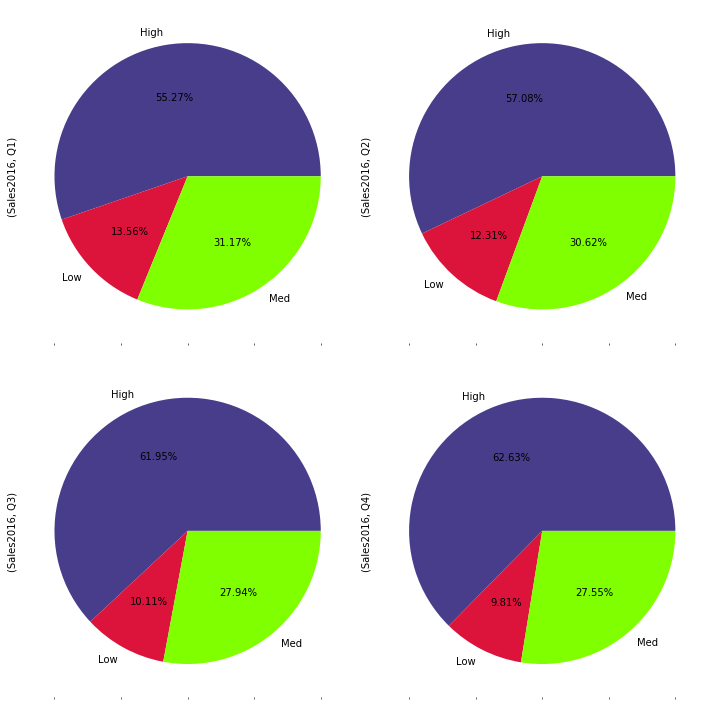

In [23]:
ax=sales8.plot.pie(subplots=True,figsize=(10,10),legend=False,autopct="%.2f%%",layout=(2,2),colors=('#483D8B','#DC143C','#7FFF00'))
plt.tight_layout()